<img src="./unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">Ecuaciones generalizadas de estimación (Efectos de contaminación en aire)</h2>

he ohio data frame has 2148 rows and 4 columns. The dataset is a subset of the ix-city study, a longitudinal study of the health effects of air pollution. This data frame contains the following columns: resp, an indicator of wheeze status
 (1=yes, 0=no); id, a numeric vector for subject id; age, a numeric vector of age,  0 is 9 years old; smoke, an indicator of maternal smoking at the first year of the study.

In [2]:
rm(list=ls())
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")
library(sqldf)
library(numDeriv)
library(Rfast)
source("macros.txt")
source("test.txt")

In [3]:
data(ohio, package="geepack")
str(ohio)
head(ohio)

'data.frame':	2148 obs. of  4 variables:
 $ resp : int  0 0 0 0 0 0 0 0 0 0 ...
 $ id   : int  0 0 0 0 1 1 1 1 2 2 ...
 $ age  : int  -2 -1 0 1 -2 -1 0 1 -2 -1 ...
 $ smoke: int  0 0 0 0 0 0 0 0 0 0 ...


resp,id,age,smoke
0,0,-2,0
0,0,-1,0
0,0,0,0
0,0,1,0
0,1,-2,0
0,1,-1,0


Las funciones que hacen las ecuaiones generalizadas de estimación es **geeglm** cuya respuesta en este caso es **resp** y el predictor lineal con interacción, además en **id** se debe especificar las filas que hacen parte de los cluster. Con **corstr** se verifica la matriz de correlación, pues hay que estimar $\Sigma$ con corrstr decimos que estructura de correlación queremos para sigma. En AR-1 la estimación sigma se realiza con el paso 1 del algoritmo.

* *Intercambiable* es cuando cualquier par de correlacion es exactamente igual
* *Exchangeable* donde la correlacion de dos observaciones depende de la distancia "entre ellos"
* *AR-1* lo que quiere decir es que la correlacion entre la medicion realizada en la semana 1 y la semana 2 es mayotr que la correlacion entre la observacion realizada en la semana 1 y la semana 4, mientras que si es intercambiable esta correlacion es la misma.

In [4]:
fit100 <- geeglm(resp ~ age + smoke + age*smoke, id=id, family=binomial("logit"), corstr="AR-1", data=ohio)
fit101 <- geeglm(resp ~ age + smoke + age*smoke, id=id, family=binomial("logit"), corstr="Exchangeable", data=ohio)
fit102 <- geeglm(resp ~ age + smoke + age*smoke, id=id, family=binomial("logit"), corstr="Unstructured", data=ohio)
fit103 <- geeglm(resp ~ age + smoke + age*smoke, id=id, family=binomial("logit"), corstr="Stationary-M-dependent(2)", data=ohio)
fit104 <- geeglm(resp ~ age + smoke + age*smoke, id=id, family=binomial("logit"), corstr="Non-Stationary-M-dependent(2)", data=ohio)

In [5]:
summary(fit100)


Sample size
       Number of clusters:  537
     Minimum cluster size:  4
     Maximum cluster size:  4
*************************************************************
Model
Variance to mean relation:  binomial
                     Link:  logit
    Correlation structure:  AR-1
*************************************************************
Coefficients
             Estimate Std.Error   z-value Pr(>|z|)
(Intercept)  -1.91951   0.12001 -15.99412  < 2e-16
age          -0.14681   0.05934  -2.47396 0.013362
smoke         0.29528   0.18997   1.55431 0.120111
age:smoke     0.08147   0.09066   0.89867 0.368828

Dispersion  1.01847 
*************************************************************
Goodness-of-fit statistics
      -2*quasi-likelihood:  1786.695 
                      QIC:  1797.464 
                     QICu:  1794.695 
 Deviance-based R-squared:  0.004 
*************************************************************
Working correlation
       [1]    [2]    [3]     [4] 
[1] 1.00000 0.399

La anterior salida queire decir que: 537 son las observaciones en otras palabras el tamaño de la muestra (537 son los valores diferentes de id registrados), *Minimum cluster size:  4* es el tamaño mínimo de cluster.

* **Variance to mean relation:  binomial**: hace referencia a la relación media varianza que en este caso es la varianza del moselo binomial que es $\mu(1-\mu)$.

* **Working correlation** Es la estimación de sigma. 


In [6]:
QIC(fit100,fit101,fit102,fit103,fit104)


Variance to mean relation:  binomial 
                     Link:  logit 
         Linear predictor:  1 + age + smoke + age:smoke 

 Object                   Correlation -2*quasi-likelihood  df    QIC  
 fit100                          AR-1            1786.695   4 1797.464
 fit101                  Exchangeable            1817.168   4 1828.022
 fit102                  Unstructured            1802.901   4 1813.659
 fit103     Stationary-M-dependent(2)            1768.212   4 1779.103
 fit104 Non-Stationary-M-dependent(2)            1766.196   4 1777.184


In [7]:
###################### Resumen del modelo seleccionado ######################
summary(fit103)


Sample size
       Number of clusters:  537
     Minimum cluster size:  4
     Maximum cluster size:  4
*************************************************************
Model
Variance to mean relation:  binomial
                     Link:  logit
    Correlation structure:  Stationary-M-dependent(2)
*************************************************************
Coefficients
             Estimate Std.Error   z-value Pr(>|z|)
(Intercept)  -1.92389   0.12098 -15.90255  < 2e-16
age          -0.13694   0.05978  -2.29083 0.021973
smoke         0.27028   0.19324   1.39869 0.161906
age:smoke     0.06619   0.09202   0.71928 0.471968

Dispersion  1.02933 
*************************************************************
Goodness-of-fit statistics
      -2*quasi-likelihood:  1768.212 
                      QIC:  1779.103 
                     QICu:  1776.212 
 Deviance-based R-squared:  0.004 
*************************************************************
Working correlation
      [1]    [2]    [3]    [4]

In [8]:
###################### Test de Wald ######################
fit100 <- geeglm(resp ~ age, id=id, family=binomial, corstr="Stationary-M-dependent(2)", data=ohio)
anova_glm(fit103,fit100,test="wald")


  Wald test 

 Model 1:  resp ~ age + smoke + age * smoke 
 Model 2:  resp ~ age 

   Chi    Df   Pr(>Chi)
  2.0405   2     0.3605


In [9]:
###################### Test de score ######################
anova_glm(fit103,fit100,test="score")


  Generalized score test 

 Model 1:  resp ~ age + smoke + age * smoke 
 Model 2:  resp ~ age 

   Chi    Df   Pr(>Chi)
  1.9956   2     0.3687


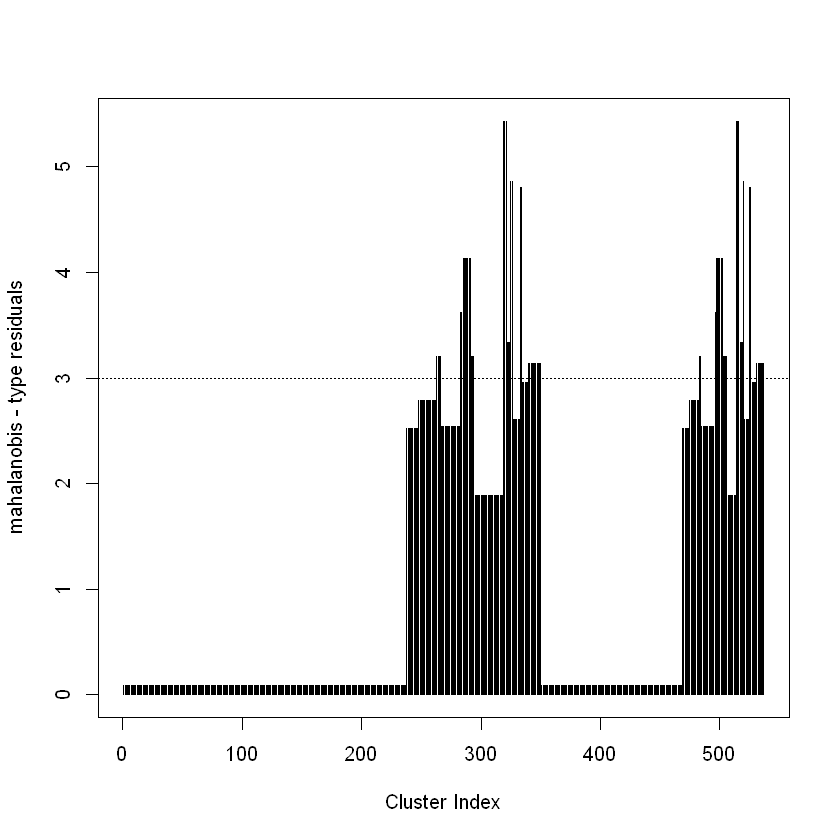

In [10]:
###################### Análisis de residuos ######################
residuals(fit100,out=FALSE,plot=TRUE,type="mahalanobis")

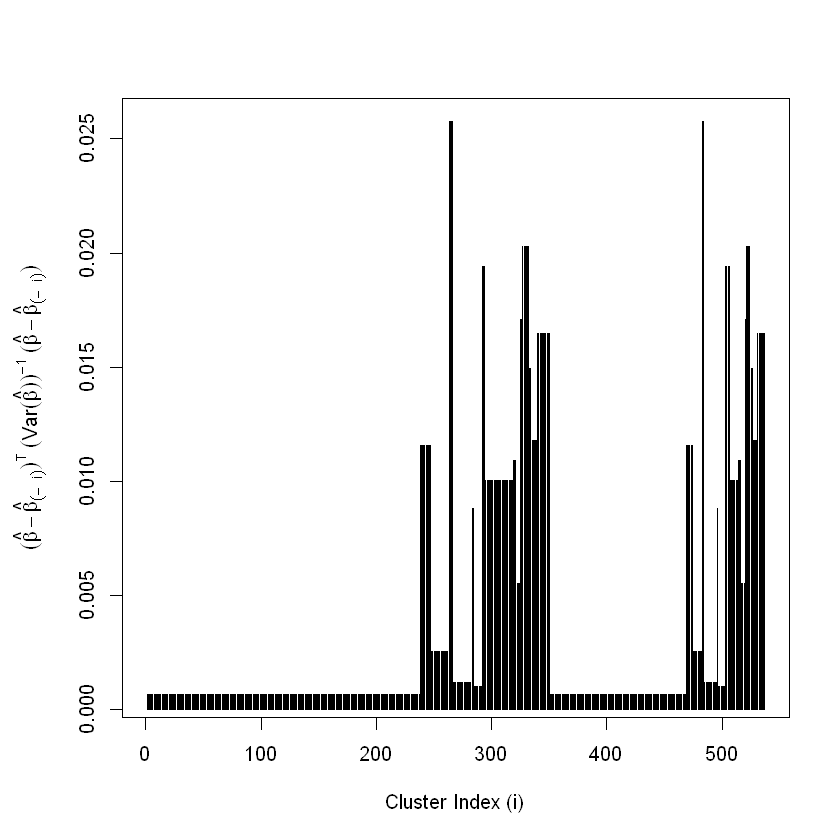

In [11]:
###################### Análisis de sensibilidad ######################
CookDistance(fit100,plot=TRUE,out=FALSE)

In [12]:

###################### Intervalos de confianza ######################
ci_glm(fit100)	


 Approximate 95 percent confidence intervals based on the Wald test 

            Lower limit Upper limit
(Intercept)    -2.00758     -1.6382
age            -0.19946     -0.0213
